# STEPS

 1. Preprocess + EDA + Feature Selection
 2. Extract input and output columns
 3. Scale the values
 4. Train test split
 5. Train the model 
 6. Evaluate the model/model selection
 7. Deploy the model

In [1]:
import numpy as numpy
import pandas as pd

In [2]:
df = pd.read_csv('placement-dataset.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
import matplotlib.pyplot as plt

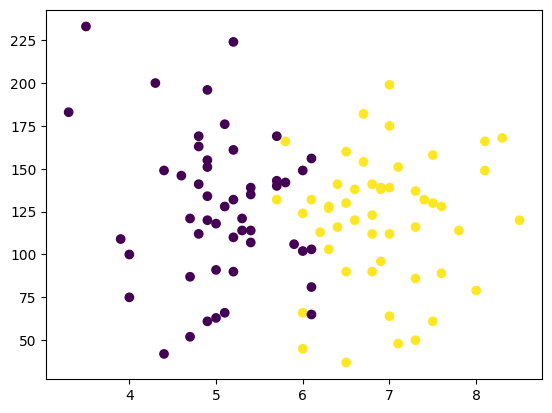

In [7]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [8]:
x = df.iloc[:,0:2] #input
y = df.iloc[:,-1]  #output

Train test split

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_train = scaler.fit_transform(x_train)

In [13]:
x_train

array([[-0.79452839, -1.45955917],
       [ 1.3009311 ,  0.21615556],
       [ 0.86437704,  0.45180295],
       [-0.00873108, -2.00940307],
       [-0.27066352,  1.23729423],
       [ 0.51513379,  0.42561991],
       [ 0.68975541,  0.50416903],
       [-1.23108245,  0.63508425],
       [-0.8818392 , -0.09804095],
       [ 0.86437704,  1.39439249],
       [ 0.95168785,  0.76599946],
       [-0.00873108, -1.45955917],
       [ 1.99941759,  1.21111119],
       [ 1.12630947, -0.93589832],
       [-0.79452839,  0.16378948],
       [-0.27066352,  0.55653512],
       [ 0.42782298,  1.00164685],
       [ 0.34051217,  0.50416903],
       [-0.70721758,  0.26852165],
       [ 0.07857973,  0.89691467],
       [ 1.56286353, -0.20277312],
       [ 0.25320135,  0.13760644],
       [ 1.38824191, -0.85734919],
       [-0.00873108,  0.71363338],
       [ 0.77706622, -0.67406789],
       [ 1.3009311 , -1.59047438],
       [ 0.42782298, -2.21886741],
       [-0.96915001,  0.32088773],
       [-1.14377163,

In [14]:
x_test = scaler.transform(x_test)

In [15]:
x_test

array([[ 1.12630947, -0.15040703],
       [-1.84225813, -0.33368833],
       [-0.70721758,  1.02782989],
       [-0.61990676, -0.01949182],
       [ 1.12630947, -1.87848785],
       [-0.70721758,  2.67736158],
       [ 0.07857973, -0.49078659],
       [ 0.86437704,  2.02278551],
       [-0.79452839,  1.42057553],
       [-0.1833527 ,  0.53035208]])

model training

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()

In [18]:
# model training
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9

plot decision boundary

In [22]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

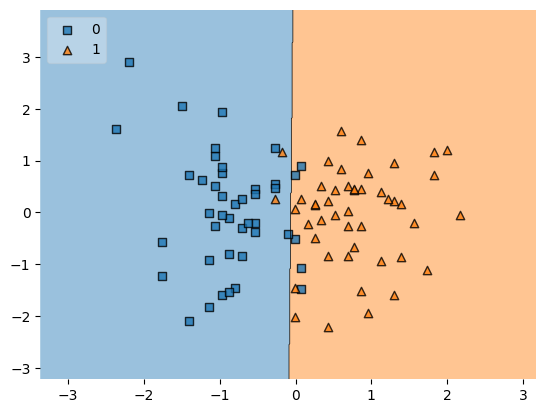

In [23]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [24]:
import pickle

In [25]:
pickle.dump(clf,open('model.pkl','wb'))